In [2]:
from google.colab import files
import seaborn as sns
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['hamstring_sprint_intensity.csv']))

Saving hamstring_sprint_intensity.csv to hamstring_sprint_intensity.csv


In [4]:
df

,Player,Position_Name,Velocity_Band_5_Total_Effort_Count,Velocity_Band_5_Total_Distance,Velocity_Band_6_Total_Effort_Count,Velocity_Band_6_Total_Distance,Distance,Player_Load,PL_Min,Hi_Accel,Hi_Decel,Date,Game
0,Player_1,OL,0,0.000,0,0.000,2426.388,376.466,3.062,0,0,7/31/25,0
1,Player_2,QB,0,0.000,0,0.000,3138.285,297.796,2.953,0,0,7/31/25,0
2,Player_3,DL,2,9.908,1,18.930,2422.083,386.680,3.132,2,3,7/31/25,0
3,Player_4,DL,1,8.005,0,0.000,2761.800,429.922,3.482,1,2,7/31/25,0
4,Player_5,TE,0,0.000,0,0.000,2446.914,302.858,2.745,4,5,7/31/25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,Player_84,WR,7,120.232,1,4.921,5933.380,569.946,2.636,14,11,10/4/25,1
3795,Player_86,LB,6,82.918,0,0.000,5262.358,521.952,2.336,5,7,10/4/25,1
3796,Player_87,OL,0,0.000,0,0.000,3391.609,414.638,1.918,0,0,10/4/25,1
3797,Player_88,WR,5,84.449,0,0.000,6669.415,729.159,3.359,16,13,10/4/25,1


In [5]:
def group(position):
    if position in ['WR', 'DB', 'RB']:
        return 'Skill'
    elif position in ['TE', 'LB', 'QB']:
        return 'Big_skill'
    else:
        return 'Line'

df['Position_Group'] = df['Position_Name'].apply(group)

In [6]:
df['Skill'] = np.where(df['Position_Group'] == 'Skill', 1, 0)
df['Big_Skill'] = np.where(df['Position_Group'] == 'Big_skill', 1, 0)

In [7]:
football_df = df.drop(['Position_Name'], axis=1)

In [8]:
football_df

,Player,Velocity_Band_5_Total_Effort_Count,Velocity_Band_5_Total_Distance,Velocity_Band_6_Total_Effort_Count,Velocity_Band_6_Total_Distance,Distance,Player_Load,PL_Min,Hi_Accel,Hi_Decel,Date,Game,Position_Group,Skill,Big_Skill
0,Player_1,0,0.000,0,0.000,2426.388,376.466,3.062,0,0,7/31/25,0,Line,0,0
1,Player_2,0,0.000,0,0.000,3138.285,297.796,2.953,0,0,7/31/25,0,Big_skill,0,1
2,Player_3,2,9.908,1,18.930,2422.083,386.680,3.132,2,3,7/31/25,0,Line,0,0
3,Player_4,1,8.005,0,0.000,2761.800,429.922,3.482,1,2,7/31/25,0,Line,0,0
4,Player_5,0,0.000,0,0.000,2446.914,302.858,2.745,4,5,7/31/25,0,Big_skill,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,Player_84,7,120.232,1,4.921,5933.380,569.946,2.636,14,11,10/4/25,1,Skill,1,0
3795,Player_86,6,82.918,0,0.000,5262.358,521.952,2.336,5,7,10/4/25,1,Big_skill,0,1
3796,Player_87,0,0.000,0,0.000,3391.609,414.638,1.918,0,0,10/4/25,1,Line,0,0
3797,Player_88,5,84.449,0,0.000,6669.415,729.159,3.359,16,13,10/4/25,1,Skill,1,0


In [9]:
# combine band 5 count and band 6 count columns
football_df['80_and_over'] = football_df['Velocity_Band_5_Total_Effort_Count'] + football_df['Velocity_Band_6_Total_Effort_Count']

In [10]:
football_df

,Player,Velocity_Band_5_Total_Effort_Count,Velocity_Band_5_Total_Distance,Velocity_Band_6_Total_Effort_Count,Velocity_Band_6_Total_Distance,Distance,Player_Load,PL_Min,Hi_Accel,Hi_Decel,Date,Game,Position_Group,Skill,Big_Skill,80_and_over
0,Player_1,0,0.000,0,0.000,2426.388,376.466,3.062,0,0,7/31/25,0,Line,0,0,0
1,Player_2,0,0.000,0,0.000,3138.285,297.796,2.953,0,0,7/31/25,0,Big_skill,0,1,0
2,Player_3,2,9.908,1,18.930,2422.083,386.680,3.132,2,3,7/31/25,0,Line,0,0,3
3,Player_4,1,8.005,0,0.000,2761.800,429.922,3.482,1,2,7/31/25,0,Line,0,0,1
4,Player_5,0,0.000,0,0.000,2446.914,302.858,2.745,4,5,7/31/25,0,Big_skill,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,Player_84,7,120.232,1,4.921,5933.380,569.946,2.636,14,11,10/4/25,1,Skill,1,0,8
3795,Player_86,6,82.918,0,0.000,5262.358,521.952,2.336,5,7,10/4/25,1,Big_skill,0,1,6
3796,Player_87,0,0.000,0,0.000,3391.609,414.638,1.918,0,0,10/4/25,1,Line,0,0,0
3797,Player_88,5,84.449,0,0.000,6669.415,729.159,3.359,16,13,10/4/25,1,Skill,1,0,5


In [11]:
# changing 80 and over column to a binary value of whether it was zero or non zero
football_df['80_and_over'] = np.where(football_df['Velocity_Band_5_Total_Effort_Count'] !=0, 1,0)

In [12]:
football_df

,Player,Velocity_Band_5_Total_Effort_Count,Velocity_Band_5_Total_Distance,Velocity_Band_6_Total_Effort_Count,Velocity_Band_6_Total_Distance,Distance,Player_Load,PL_Min,Hi_Accel,Hi_Decel,Date,Game,Position_Group,Skill,Big_Skill,80_and_over
0,Player_1,0,0.000,0,0.000,2426.388,376.466,3.062,0,0,7/31/25,0,Line,0,0,0
1,Player_2,0,0.000,0,0.000,3138.285,297.796,2.953,0,0,7/31/25,0,Big_skill,0,1,0
2,Player_3,2,9.908,1,18.930,2422.083,386.680,3.132,2,3,7/31/25,0,Line,0,0,1
3,Player_4,1,8.005,0,0.000,2761.800,429.922,3.482,1,2,7/31/25,0,Line,0,0,1
4,Player_5,0,0.000,0,0.000,2446.914,302.858,2.745,4,5,7/31/25,0,Big_skill,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,Player_84,7,120.232,1,4.921,5933.380,569.946,2.636,14,11,10/4/25,1,Skill,1,0,1
3795,Player_86,6,82.918,0,0.000,5262.358,521.952,2.336,5,7,10/4/25,1,Big_skill,0,1,1
3796,Player_87,0,0.000,0,0.000,3391.609,414.638,1.918,0,0,10/4/25,1,Line,0,0,0
3797,Player_88,5,84.449,0,0.000,6669.415,729.159,3.359,16,13,10/4/25,1,Skill,1,0,1


In [13]:
# count how many 1 is in the 80 and over column
football_df['80_and_over'].value_counts()

,count
80_and_over,
0,2393
1,1406


# Exporative Data Analysis

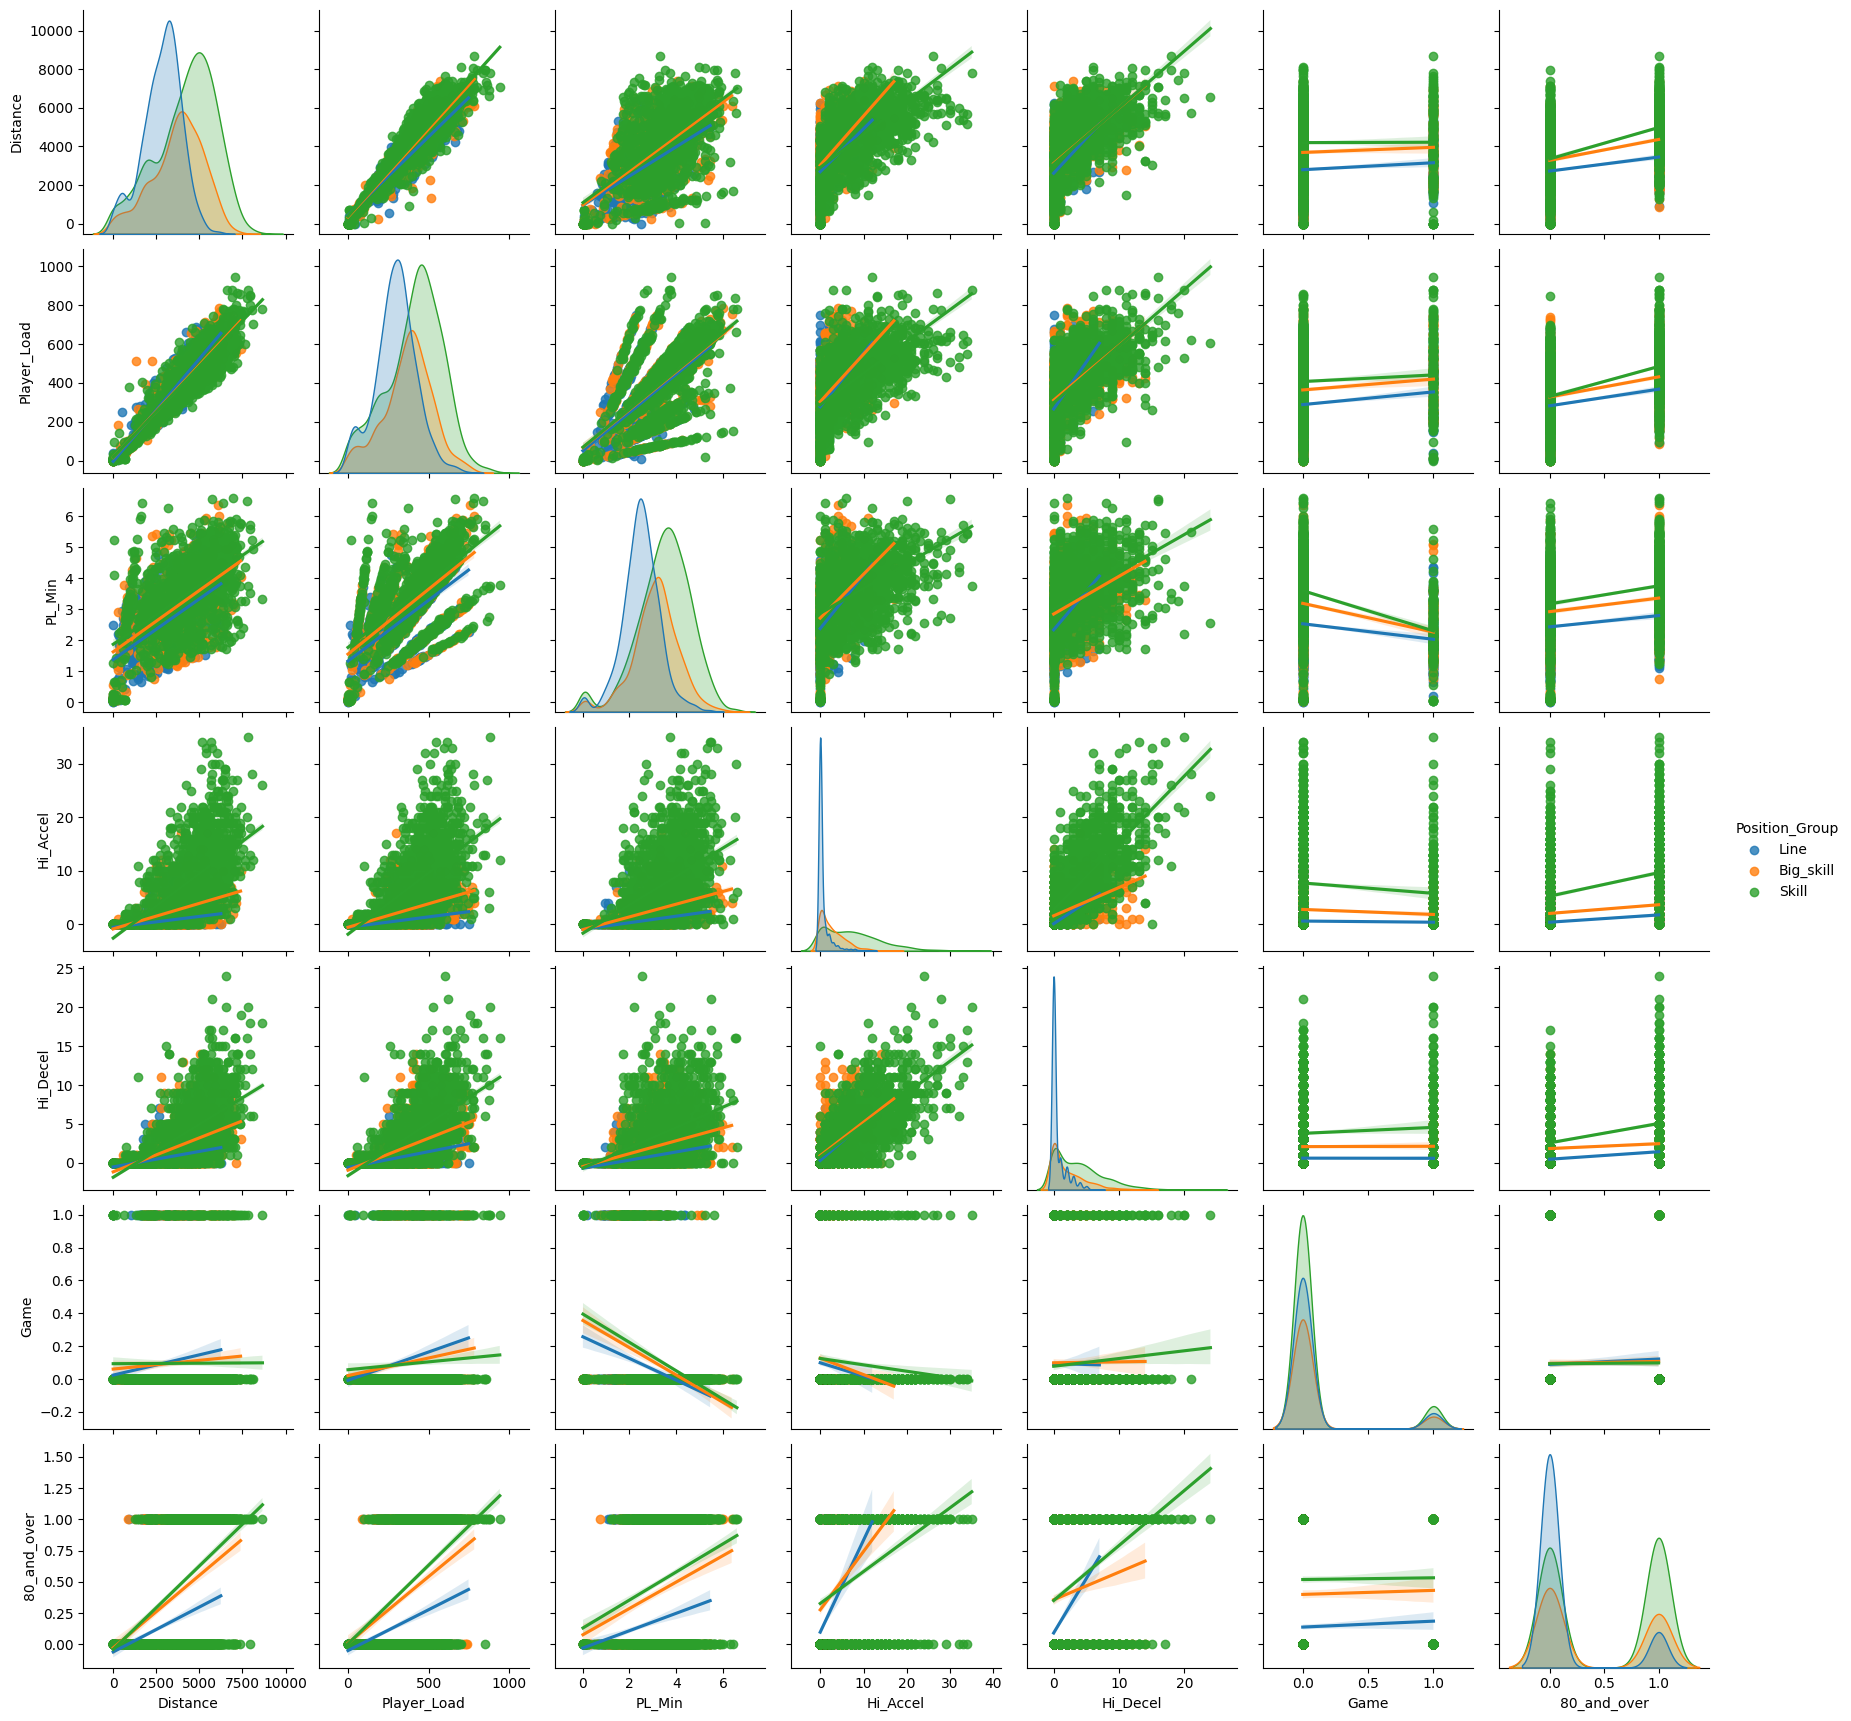

In [14]:
sns.pairplot(football_df,hue= 'Position_Group', kind= 'reg', vars=['Distance', 'Player_Load', 'PL_Min', 'Hi_Accel', 'Hi_Decel', 'Game', '80_and_over'])

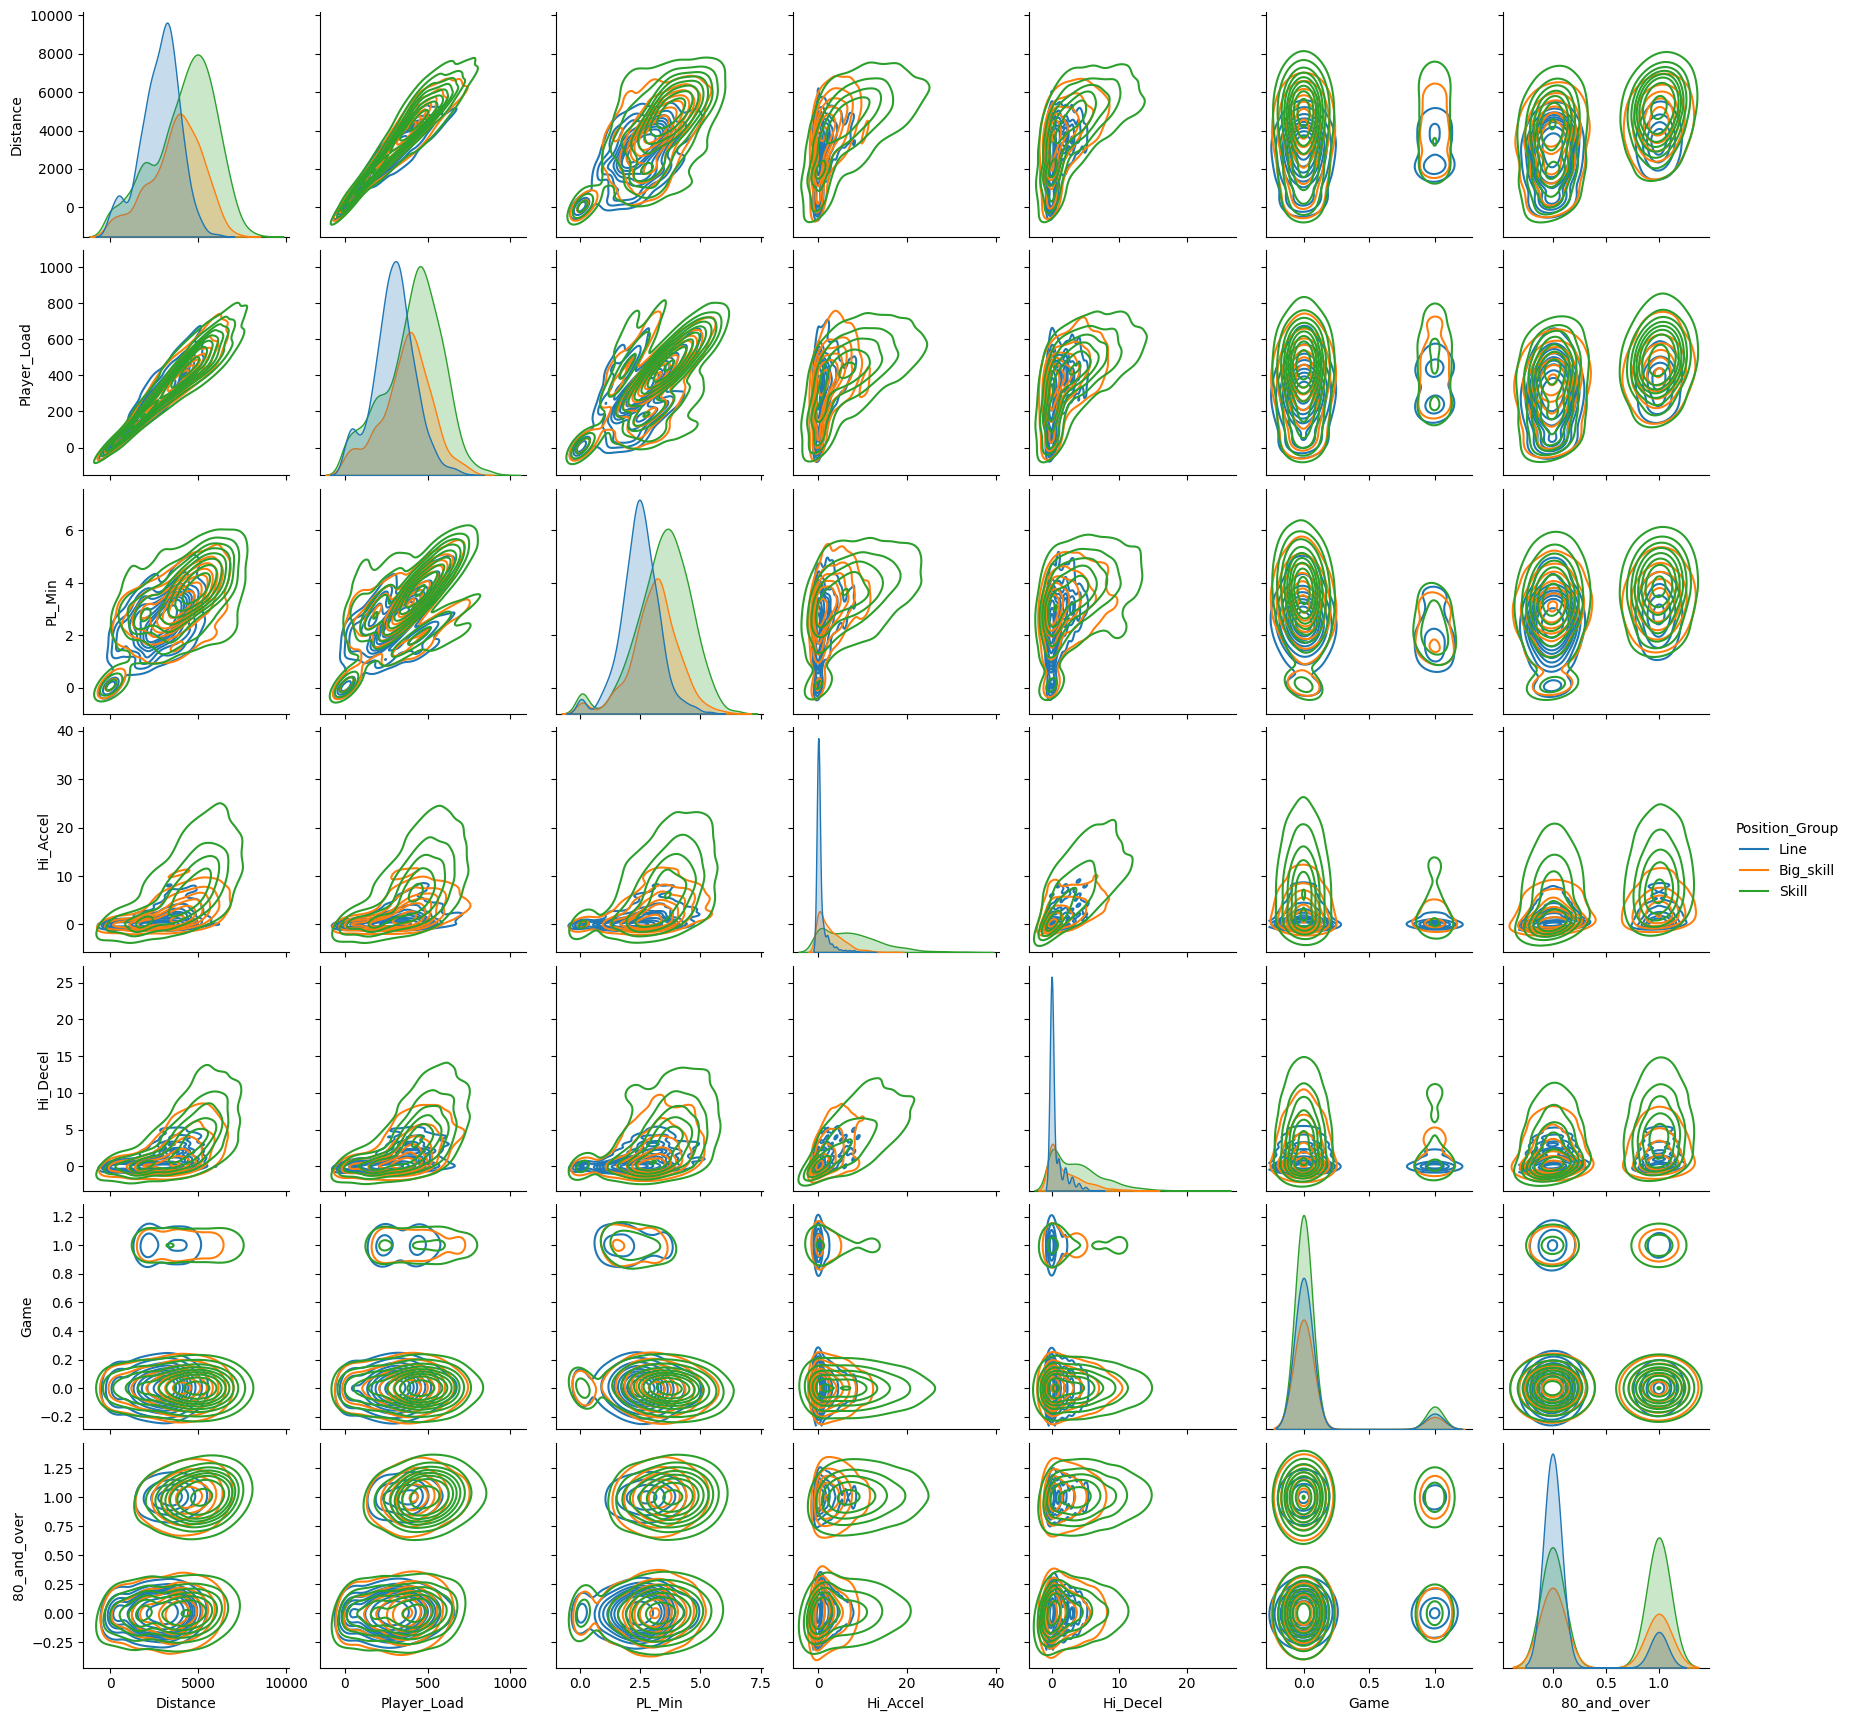

In [15]:
sns.pairplot(football_df,hue= 'Position_Group', kind= 'kde', vars=['Distance', 'Player_Load', 'PL_Min', 'Hi_Accel', 'Hi_Decel', 'Game', '80_and_over'])

In [16]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

y = football_df['80_and_over']
X = football_df[['Distance', 'Player_Load', 'PL_Min', 'Hi_Accel', 'Hi_Decel', 'Game', 'Skill', 'Big_Skill']]
X = sm.add_constant(X)

log_model = GLM(y, X, family=families.Binomial())
log_results = log_model.fit()

In [17]:
print(log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            80_and_over   No. Observations:                 3799
Model:                            GLM   Df Residuals:                     3790
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1963.0
Date:                Wed, 10 Dec 2025   Deviance:                       3925.9
Time:                        04:24:03   Pearson chi2:                 3.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2477
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.5423      0.170    -20.790      

In [18]:
def forward_selection(X, y, initial_features=[], threshold_in=0.05, verbose=True):
    """Performs forward stepwise selection based on p-value."""
    included = list(initial_features)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pvalues = pd.Series(index=excluded)
        for col in excluded:
            model = sm.OLS(y, X[included + [col]]).fit()
            new_pvalues[col] = model.pvalues[col]
        best_pval = new_pvalues.min()
        if best_pval < threshold_in:
            best_feature = new_pvalues.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add {best_feature} with p-value {best_pval:.4f}')
        if not changed:
            break
    return included

In [19]:
selected_features = forward_selection(X, y, initial_features=['const'])
print(f"\nSelected features: {selected_features}")

Add Distance with p-value 0.0000
Add Hi_Accel with p-value 0.0000
Add Skill with p-value 0.0000
Add Big_Skill with p-value 0.0000

Selected features: ['const', 'Distance', 'Hi_Accel', 'Skill', 'Big_Skill']


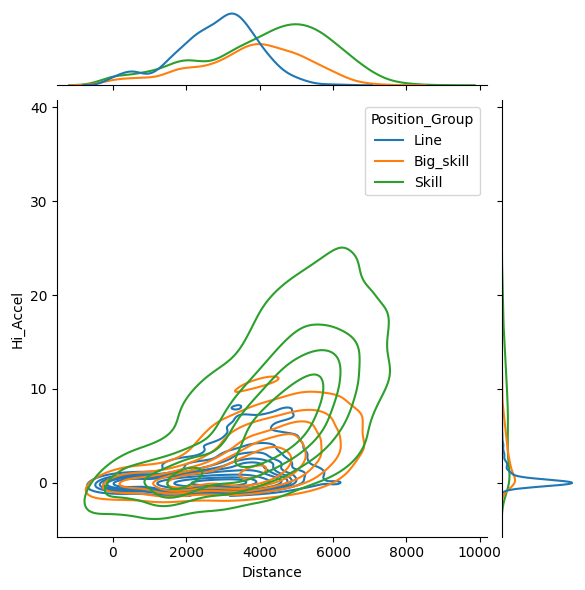

In [20]:
sns.jointplot(data=football_df, x="Distance", y="Hi_Accel", hue="Position_Group", kind="kde")

In [21]:
red_x = X[selected_features]
reduced_model =  GLM(y, red_x, family=families.Binomial())
reduced_results = reduced_model.fit()

In [22]:
print(reduced_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            80_and_over   No. Observations:                 3799
Model:                            GLM   Df Residuals:                     3794
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1965.3
Date:                Wed, 10 Dec 2025   Deviance:                       3930.6
Time:                        04:24:07   Pearson chi2:                 3.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2468
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5457      0.138    -25.668      0.0

<Axes: xlabel='Position_Group', ylabel='Distance'>

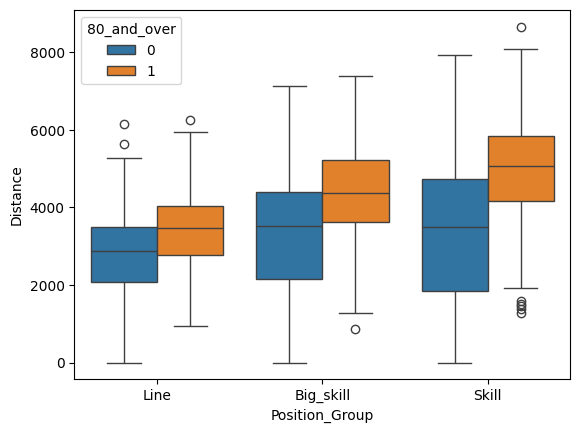

In [23]:
sns.boxplot(data=football_df, x="Position_Group", y="Distance", hue="80_and_over")

<Axes: xlabel='Position_Group', ylabel='Hi_Accel'>

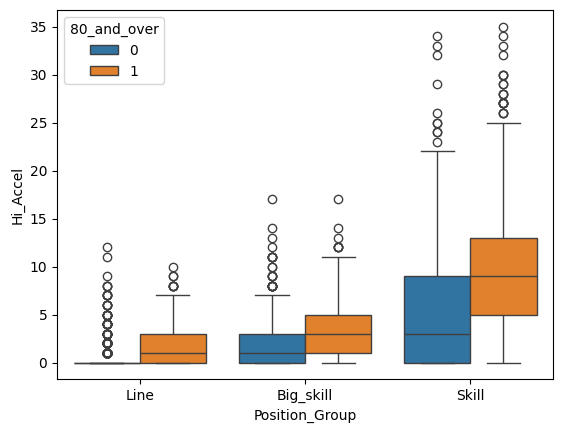

In [24]:
sns.boxplot(data=football_df, x="Position_Group", y="Hi_Accel", hue="80_and_over")

# Diagnostics

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(red_x, y)
y_pred = logreg.predict(red_x)

In [26]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

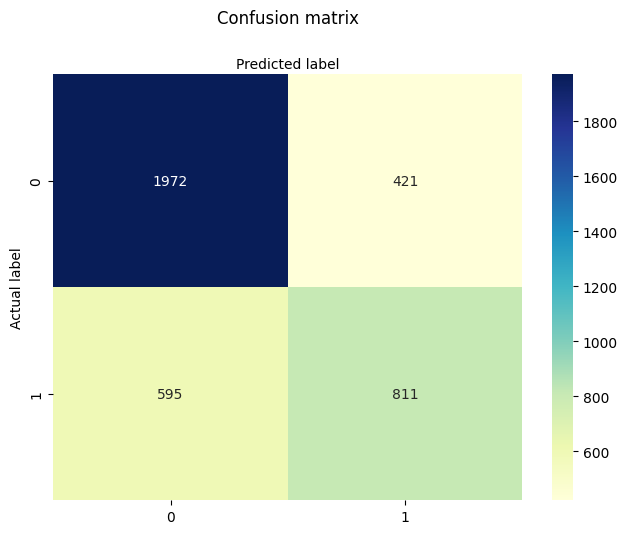

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
target_names = ['Did not hit high velo', 'Hit high velo']
print(classification_report(y, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Did not hit high velo       0.77      0.82      0.80      2393
        Hit high velo       0.66      0.58      0.61      1406

             accuracy                           0.73      3799
            macro avg       0.71      0.70      0.71      3799
         weighted avg       0.73      0.73      0.73      3799



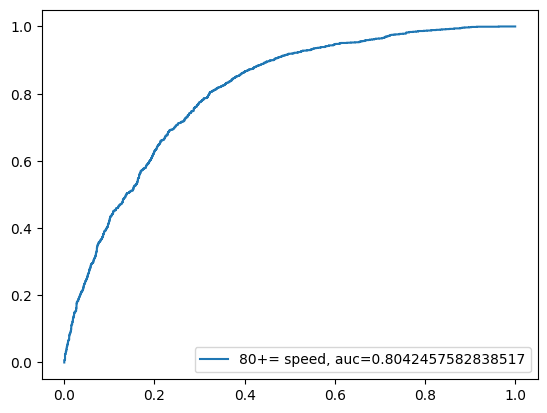

In [29]:
y_pred_proba = logreg.predict_proba(red_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="80+= speed, auc="+str(auc))
plt.legend(loc=4)
plt.show()